# Heart Disease Prediction using Machine Learning

Internship Project: Digital Empowerment Network (ML Week 1)  
Mentor: Hussain Shoaib  
Student: Zarar Shahid  

### 🧠 Objective:
To understand and implement a complete ML workflow on a real-world dataset.  
We’ll explore, preprocess, analyze, model, evaluate, and compare different algorithms.

📅 Deadline: July 23, 2025

## 1. Import Libraries

Import all required libraries such as pandas, numpy, matplotlib, seaborn, scikit-learn modules, joblib, and warnings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import joblib
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 2. Load Dataset

Load the heart disease dataset using pandas and display the first few rows.

In [21]:
# Load the Heart Disease dataset
df = pd.read_csv("heart.csv")  # Ensure the file is in the same directory

# Display top 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 3. Basic Info and Data Inspection

Check the shape, info, and missing values in the dataset.

In [22]:
# Dataset shape and info
print("Dataset Shape:", df.shape)
df.info()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Dataset Shape: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR     

## 4. Data Preprocessing

Separate features and target, scale features, and split the data into training and testing sets.

In [23]:
# Check column names to find the target column
print("Columns in dataset:", df.columns)

# Use the correct target column name below
X = df.drop(df.columns[-1], axis=1)  # assumes target is the last column
y = df[df.columns[-1]]

# Encode categorical columns automatically
X_encoded = pd.get_dummies(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Columns in dataset: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Training size: (734, 20)
Testing size: (184, 20)


## 5. Exploratory Data Analysis (EDA)

Visualize feature correlations using a heatmap.

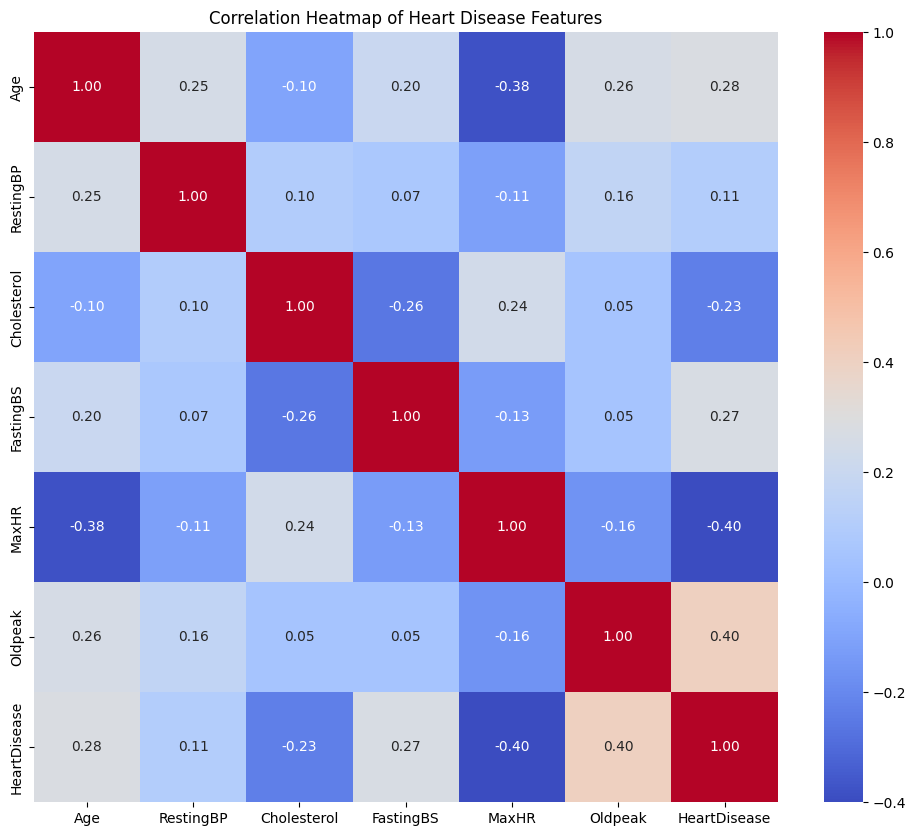

In [24]:
# Correlation Heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

## 6. Model Evaluation Function

Define a function to evaluate models using accuracy, precision, recall, F1 score, confusion matrix, and classification report.

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

## 7. Decision Tree Model

Train and evaluate a Decision Tree classifier.

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("🎯 Decision Tree Results")
evaluate_model(dt, X_test, y_test)

🎯 Decision Tree Results
Accuracy: 0.7934782608695652
Precision: 0.8137254901960784
Recall: 0.8137254901960784
F1 Score: 0.8137254901960784
Confusion Matrix:
 [[63 19]
 [19 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        82
           1       0.81      0.81      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



## 8. Random Forest Model

Train and evaluate a Random Forest classifier.

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("🎯 Random Forest Results")
evaluate_model(rf, X_test, y_test)

🎯 Random Forest Results
Accuracy: 0.8913043478260869
Precision: 0.8942307692307693
Recall: 0.9117647058823529
F1 Score: 0.9029126213592233
Confusion Matrix:
 [[71 11]
 [ 9 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



## 9. Logistic Regression Model

Train and evaluate a Logistic Regression model.

In [28]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
print("🎯 Logistic Regression Results")
evaluate_model(lr, X_test, y_test)

🎯 Logistic Regression Results
Accuracy: 0.8858695652173914
Precision: 0.8715596330275229
Recall: 0.9313725490196079
F1 Score: 0.9004739336492891
Confusion Matrix:
 [[68 14]
 [ 7 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



## 10. Support Vector Machine (SVM) Model

Train and evaluate a Support Vector Machine classifier.

In [29]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
print("🎯 SVM Results")
evaluate_model(svm, X_test, y_test)

🎯 SVM Results
Accuracy: 0.8858695652173914
Precision: 0.8715596330275229
Recall: 0.9313725490196079
F1 Score: 0.9004739336492891
Confusion Matrix:
 [[68 14]
 [ 7 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



## 11. Hyperparameter Tuning with GridSearchCV

Use GridSearchCV to tune Random Forest hyperparameters and evaluate the best model.

In [30]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
print("🎯 Tuned Random Forest Results")
evaluate_model(grid.best_estimator_, X_test, y_test)

✅ Best Parameters: {'max_depth': 5, 'n_estimators': 100}
🎯 Tuned Random Forest Results
Accuracy: 0.8967391304347826
Precision: 0.8807339449541285
Recall: 0.9411764705882353
F1 Score: 0.909952606635071
Confusion Matrix:
 [[69 13]
 [ 6 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88        82
           1       0.88      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



## 12. Save Best Model

Save the best trained model using joblib.

In [31]:
joblib.dump(grid.best_estimator_, 'best_rf_model.pkl')
print("💾 Model saved as 'best_rf_model.pkl'")

💾 Model saved as 'best_rf_model.pkl'
